# DSCI Project Planning Stage (Individual)
### Amanda Ren
## 1. Data Description
- **Players.csv:** Information about each player.
  - experience: Character level.
  - subscribe: Subscription to newsletter
  - hashedEmail: Something to identify player.
  - played_hours: Total hours played
  - name: Player's first name
  - gender: Gender identity
  - age: Players' age(missing some values)
****
- **Sessions.csv:**
  - session_id: Session identifier.
  - player_id: Links to players.csv.
  - start_time & end_time: Time sessions began/ended.
  - duration_minutes: Duration of session.
  - blocks_placed & blocks_destroyed: Number of blocks placed/destroyed.
  - items_collected: Items gathered

In [18]:
library(tidyverse)
library(lubridate)
library(GGally)
library(scales)

set.seed(2000)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [19]:
nrow(players)
ncol(players)
str(players)

[1] 196

[1] 7

spc_tbl_ [196 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ experience  : chr [1:196] "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe   : logi [1:196] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail : chr [1:196] "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours: num [1:196] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name        : chr [1:196] "Morgan" "Christian" "Blake" "Flora" ...
 $ gender      : chr [1:196] "Male" "Male" "Male" "Female" ...
 $ Age         : num [1:196] 9 17 17 21 21 17 19 21 47 22 ...
 - attr(*, "spec")=
  .. cols(
  ..   experience = col_character(),
  ..   subscribe = col_logical(),
  ..   hashedEmail = col_character(),
  ..   played_hours = col_double(),
  ..   name = col_character(),
  ..   gender = col_character(),
  ..   

In [20]:
summary_players <- data.frame(
    Variable = names(players),
    Summary = sapply(players, function(x) if(is.numeric(x)) round(mean(x, na.rm = TRUE), 2) else "N/A")
        )
summary_players

,Variable,Summary
,<chr>,<chr>
experience,experience,N/A
subscribe,subscribe,N/A
hashedEmail,hashedEmail,N/A
played_hours,played_hours,5.85
name,name,N/A
gender,gender,N/A
Age,Age,21.14


In [21]:
nrow(players)
ncol(players)
str(players)

[1] 196

[1] 7

spc_tbl_ [196 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ experience  : chr [1:196] "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe   : logi [1:196] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail : chr [1:196] "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours: num [1:196] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name        : chr [1:196] "Morgan" "Christian" "Blake" "Flora" ...
 $ gender      : chr [1:196] "Male" "Male" "Male" "Female" ...
 $ Age         : num [1:196] 9 17 17 21 21 17 19 21 47 22 ...
 - attr(*, "spec")=
  .. cols(
  ..   experience = col_character(),
  ..   subscribe = col_logical(),
  ..   hashedEmail = col_character(),
  ..   played_hours = col_double(),
  ..   name = col_character(),
  ..   gender = col_character(),
  ..   

In [22]:
summary_players <- data.frame(
    Variable = names(players),
    Summary = sapply(players, function(x) if(is.numeric(x)) round(mean(x, na.rm = TRUE), 2) else "N/A")
        )
summary_players

,Variable,Summary
,<chr>,<chr>
experience,experience,N/A
subscribe,subscribe,N/A
hashedEmail,hashedEmail,N/A
played_hours,played_hours,5.85
name,name,N/A
gender,gender,N/A
Age,Age,21.14


In [23]:
nrow(sessions)
ncol(sessions)
str(sessions)

[1] 1535

[1] 5

spc_tbl_ [1,535 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ hashedEmail        : chr [1:1535] "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" "36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686" "f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc" "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" ...
 $ start_time         : chr [1:1535] "30/06/2024 18:12" "17/06/2024 23:33" "25/07/2024 17:34" "25/07/2024 03:22" ...
 $ end_time           : chr [1:1535] "30/06/2024 18:24" "17/06/2024 23:46" "25/07/2024 17:57" "25/07/2024 03:58" ...
 $ original_start_time: num [1:1535] 1.72e+12 1.72e+12 1.72e+12 1.72e+12 1.72e+12 ...
 $ original_end_time  : num [1:1535] 1.72e+12 1.72e+12 1.72e+12 1.72e+12 1.72e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   hashedEmail = col_character(),
  ..   start_time = col_character(),
  ..   end_time = col_character(),
  ..   original_start_time = col_double(),
  ..   original_end_time = col_double()


In [24]:
summary_sessions <- data.frame(
    Variable = names(sessions),
    Summary = sapply(sessions, function(x) if(is.numeric(x)) round(mean(x, na.rm = TRUE), 2) else "N/A")
        )
summary_sessions

,Variable,Summary
,<chr>,<chr>
hashedEmail,hashedEmail,N/A
start_time,start_time,N/A
end_time,end_time,N/A
original_start_time,original_start_time,1719201355048.86
original_end_time,original_end_time,1719195949119.37


**How data was collected:**
- The data was recorded by a Minecraft server made by UBC’s Compsci department
- Each event was logged with timestamps.
****
**Potential issues:**
- Sessions cut off/missing timestamps because of disconnections.
- Long play times & unrealistic activity.
- Adjusting time zones
- Players who join but don’t play appear in players.csv, not sessions.csv
- Lagging/issues with connection.

## 2. Questions
**Broad Question:** We are interested in demand forecasting…high probability (Question 3).
  - This question is important since the server has limited resources & licenses. Predicting when the server will have the most players lets the team ensure there are enough licenses and server size to accommodate all players without lag/disconnection.
****
**Specific Question:** Can the days of the week and the hour of day predict the activity of players on the server in a specific time frame?
  - This version of the question involves:
    - Responsible variable: Number of active players in a given window.
    - Explanatory variable: the day of week & hour of day from the start time of each session.
****
**Why this matters:** 
- Understanding will give admin a better allocation of resources.
- Improving update schedules & maintenance to avoid peak times.
- Targeted recruitment/engagement when players are least active.
****
**Data Needed**
I will use sessions.csv, which contains timestamps and player activity. Then merge variables from players.csv (to check player demographics affecting activity times).

In [25]:
sessions <- transform(sessions, 
                     start_time_parsed  = dmy_hm(sessions[["start_time"]])
                     )
sessions <- transform(sessions,
                     days_of_week = weekdays(sessions[["start_time_parsed"]]),
                     hours_of_day = hour(sessions[["start_time_parsed"]])
                     )
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time,start_time_parsed,days_of_week,hours_of_day
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<int>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,2024-06-30 18:12:00,Sunday,18
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,2024-06-17 23:33:00,Monday,23
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,2024-07-25 17:34:00,Thursday,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,2024-07-25 03:22:00,Thursday,3
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,2024-05-25 16:01:00,Saturday,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,2024-06-23 15:08:00,Sunday,15
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12,2024-04-15 07:12:00,Monday,7
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12,2024-09-21 02:13:00,Saturday,2
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12,2024-06-21 02:31:00,Friday,2


**Explanation**
1. I use dmy_hm to parse start_time. This makes the format day-month-year hour:minute.
2. When the date-time object is found, I use weekdays() to extract the day of the week for each session. 
3. I use hour() to extract the hour from the start time. This returns a number representing the hour the session started. 

## 3. Exploratory Data Analysis and Visualization

In [26]:
# First, I will load the dataset just as a reminder
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [27]:
numeric_cols <- sapply(players, is.numeric)

num_numeric <- sum(numeric_cols)

mean_values <- data.frame(variable = character(num_numeric), mean_value = numeric(num_numeric), stringsAsFactors = FALSE)

index <- 1

for(i in 1:length(numeric_cols)) {
    if (numeric_cols[i]) {
        mean_values [index, 1] <- names(players)[i]
        mean_values[index, 2] <- round(mean(players[[i]], na.rm = TRUE), 2)
        index <- index + 1
}
    }
mean_values

variable,mean_value
<chr>,<dbl>
played_hours,5.85
Age,21.14


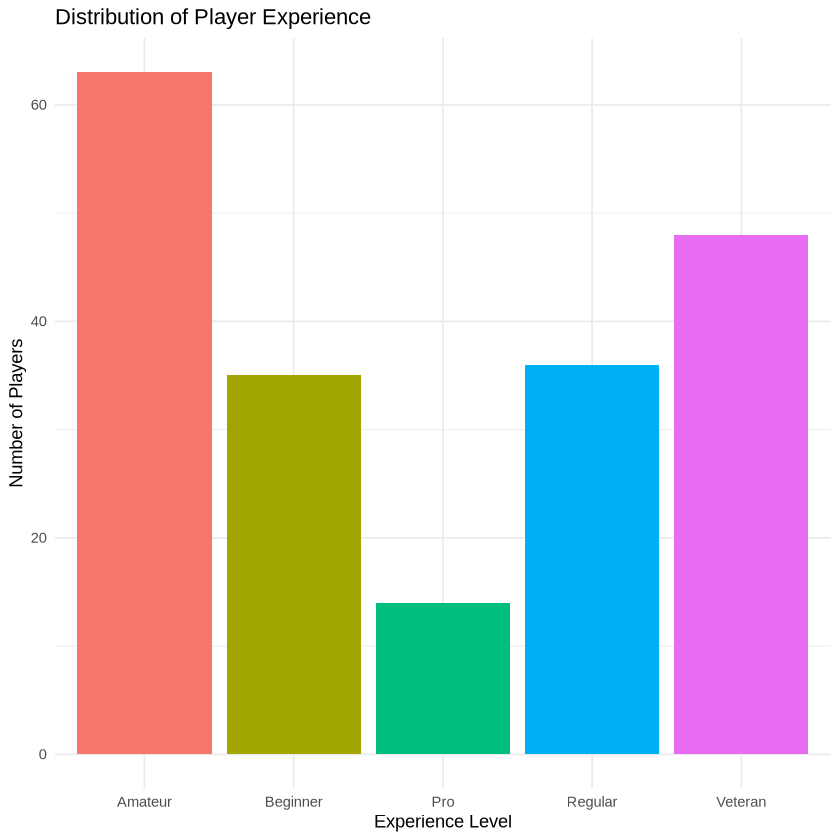

In [28]:
# Distribution of Player Experience
ggplot(players, aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(title = "Distribution of Player Experience",
         x = "Experience Level",
         y = "Number of Players") +
    theme_minimal() +
    theme(legend.position = "none")

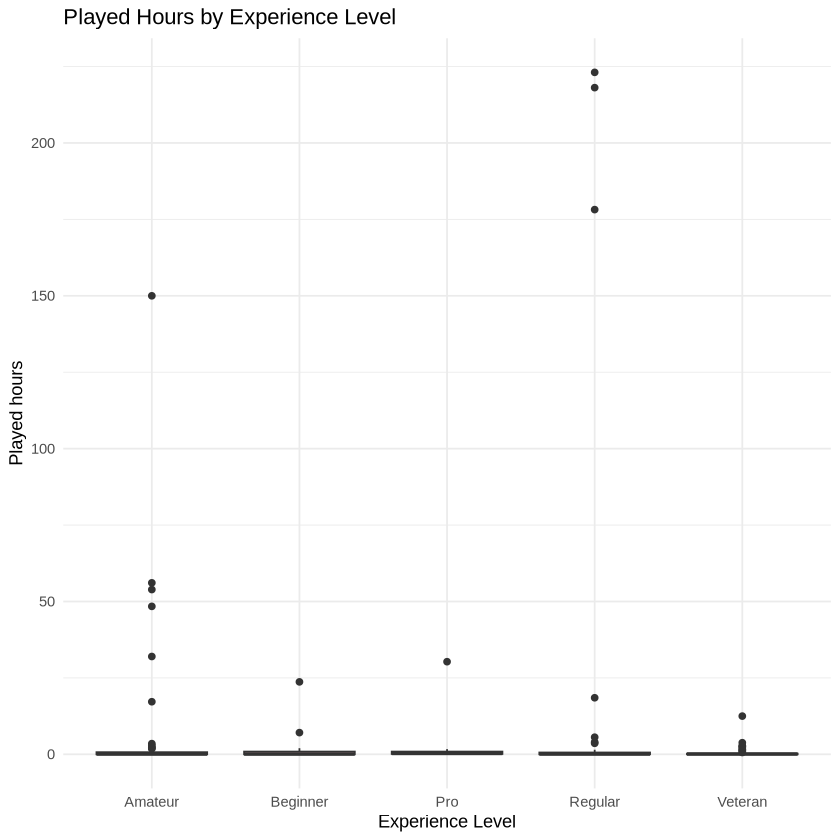

In [29]:
# Played Hours by Experience Level
ggplot(players, aes(x = experience, y = played_hours)) +
    geom_boxplot(fill = "pink") +
    labs(title = "Played Hours by Experience Level",
        x = "Experience Level",
        y = "Played hours") +
    theme_minimal()

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


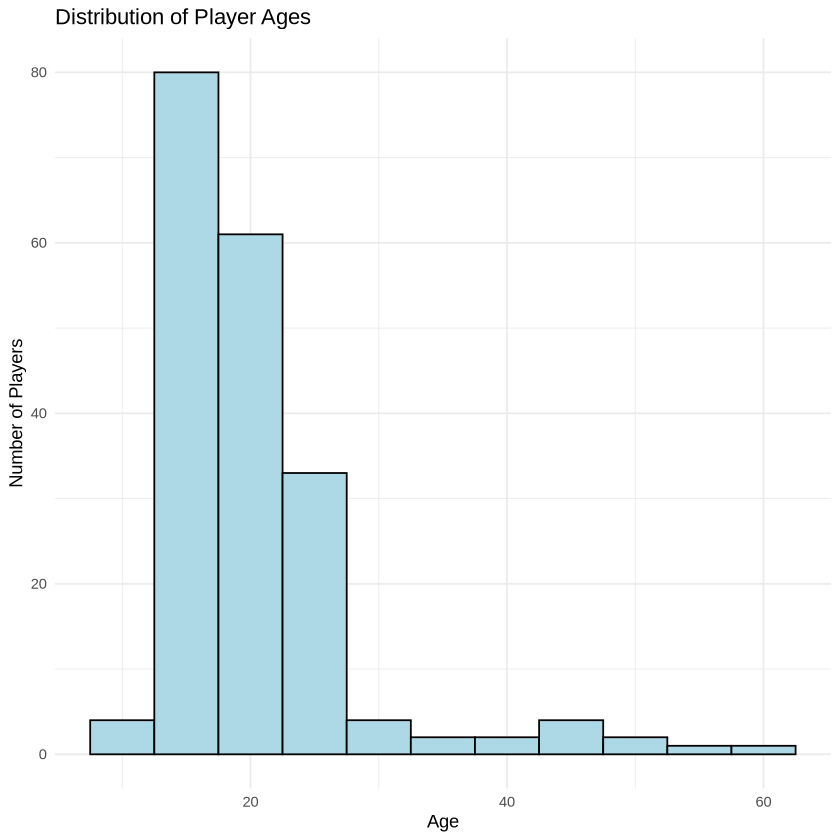

In [30]:
# Age Distribution of Players
ggplot(players, aes(x = Age)) +
    geom_histogram(binwidth = 5, fill = "lightblue", color = "black") +
    labs(title = "Distribution of Player Ages",
        x = "Age",
        y = "Number of Players") +
    theme_minimal()

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


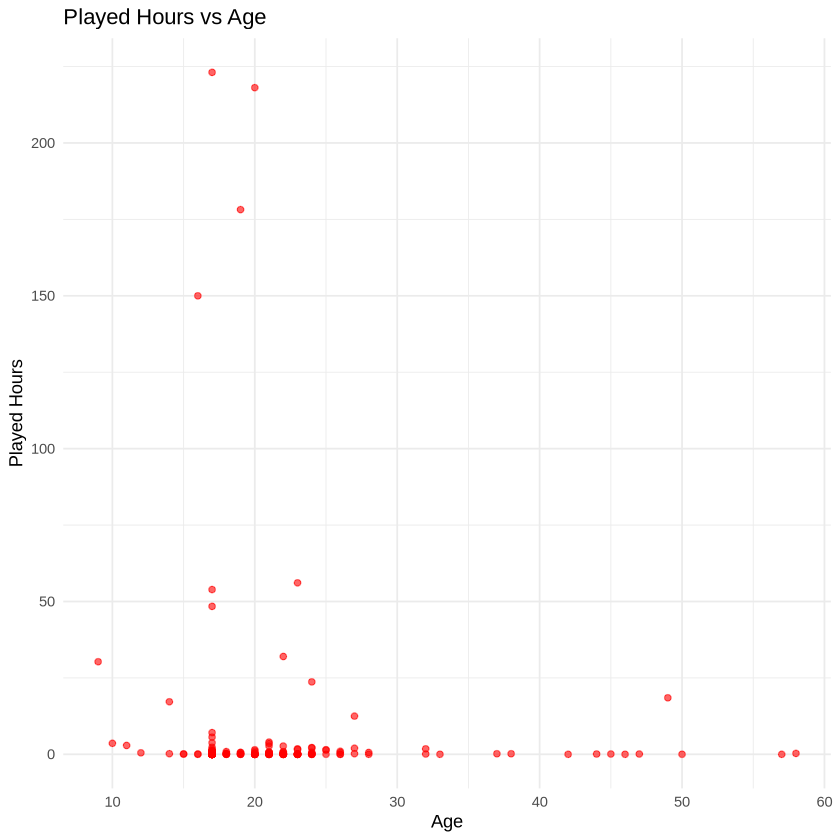

In [31]:
# Played Hours vs Age
ggplot(players, aes(x = Age, y = played_hours)) +
    geom_point(color = "red", alpha = 0.6) +
    labs(title = "Played Hours vs Age",
        x = "Age",
        y = "Played Hours") +
    theme_minimal()

**Experience:** Majority of players are amateurs and beginners; the main player base is casual.

**Played Hours:** Most players have low activity; majority being under 50, but there are some outliers above 150. The higher playtimes affect averages. 

**Age:** Majority are young players; there are a few older players who throw off averages. 

**Potential Issues**:
 - Extreme hours played affect the analysis
 - Missing/zero values in age & played_hours
 - Gender diversity

## 4. Methods and Plan
**Proposed method:** I will use a linear regression model to examine how player characteristics (experience, age, total hours) predict their performance/engagement in game. It helps determine whether players who spend more time playing achieve higher outcomes/experience. 
****
**Why this method is appropriate:** Linear regression is suitable since the predictor variables (played hours, age) & outcome variables (performance/experience level) are numeric/ordered. This method helps identify the relationships between these variables. 
****
**Assumptions required:** To use linear regression, these assumptions are needed:
1. The relationship between predictors
2. Each player's data is independent.
3. Errors should have equal variances across all fitted values
4. Errors should follow a normal distribution.
****
**Potential limitations/weaknesses:** 
- Player data contains outliers.
- Variables are not numeric, making interpretation hard if categories aren’t included.
- Unmeasured factors affect performance, & aren’t included in datasets.
****
**Model comparison and selection:** Start with a basic linear model, test multiple models, adding/removing predictors. Then compare how well they make sense using plots and checking if the line of best fit matches the data. 
****
**Data processing plan:** 
- Clean the data by removing missing & invalid values.
- Ensure all numeric columns are in the right format.
- Split data into a training set to build model & testing set to check.
- Split will happen after the cleaning step, so no data will leak between sets.

## 5. Github Repository
https://github.com/amandaarenn/DSCI-100-Individual-Project-Planning.git